<a href="https://colab.research.google.com/github/mohanrajmit/DL-Training/blob/master/MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

np.random.seed(35)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, '0')

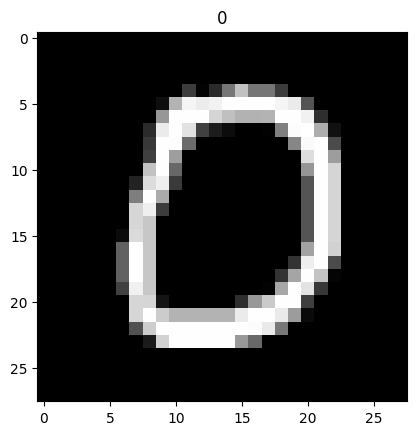

In [5]:
plt.imshow(X_test[10], cmap='gray')
plt.title(y_test[10])

In [6]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

In [7]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[10], Y_train[10]

(3, array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [25]:
model = Sequential()

model.add(Dense(512, input_dim=784,activation='relu'))
# An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.
#model.add(Activation('relu'))
# Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dropout(0.2))

model.add(Dense(256,activation='relu'))
#model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
#model.add(Activation('softmax'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)               

In [40]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', mode='max',patience=10)

In [51]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os

fname = os.path.sep.join(["/content/weight","weights-{epoch:03d}-{val_loss:.4f}.h5"])

In [52]:
mc = ModelCheckpoint(fname, monitor='val_loss', mode='min', save_best_only=True)

In [53]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)               

In [55]:
size = int(len(X_train) * 0.8)

train_x, val_x = X_train[:size], X_train[size:]
train_y, val_y = Y_train[:size], Y_train[size:]

In [56]:
train_x.shape

(48000, 784)

In [57]:
val_x.shape

(12000, 784)

In [58]:
X_test.shape

(10000, 784)

In [59]:
hist = model.fit(train_x, train_y, batch_size=128, epochs=100,callbacks=[es,mc], validation_data=(val_x, val_y))

Epoch 1/100
375/375 [==============================] - 4s 5ms/step - loss: 0.0140 - accuracy: 0.9963 - val_loss: 0.1342 - val_accuracy: 0.9819
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0113 - accuracy: 0.9964 - val_loss: 0.1272 - val_accuracy: 0.9831
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.1231 - val_accuracy: 0.9818
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0097 - accuracy: 0.9971 - val_loss: 0.1208 - val_accuracy: 0.9812
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.1304 - val_accuracy: 0.9817
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.1256 - val_accuracy: 0.9810
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0113 - accuracy: 0.9968 - val_loss: 0.1275 - val_accuracy: 0.9802

In [34]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0804 - accuracy: 0.9816

Test accuracy:  0.9815999865531921


In [35]:
predictions = model.predict(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('output.csv', index=False)

313/313 [==============================] - 1s 2ms/step


In [36]:
np.argmax(predictions[1])

2

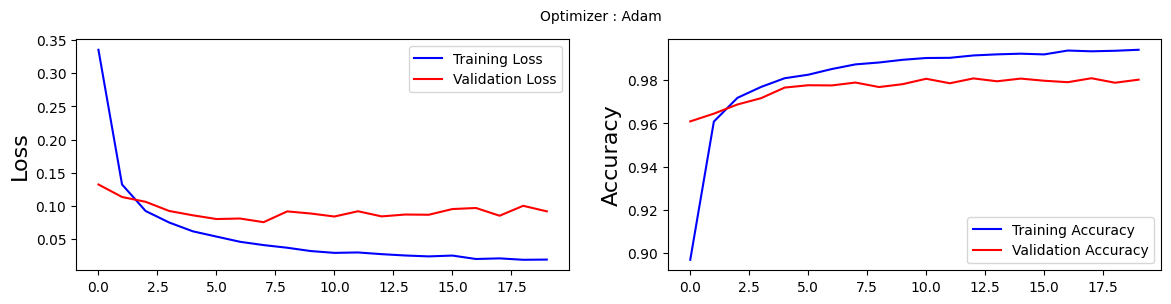

In [37]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()